In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter('ignore')
import sqlite3

C:\Users\diego\AppData\Local\Temp\ipykernel_13824\1139840685.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Sales_connection= sqlite3.connect("go_sales.sqlite")
Crm_connection= sqlite3.connect("go_crm.sqlite")
newQuery = "SELECT * FROM sales_branch"
sales_branch = pd.read_sql(newQuery,Sales_connection)

newQuery = "SELECT * FROM country"
country_crm = pd.read_sql(newQuery,Crm_connection)

In [3]:
df = pd.merge(sales_branch, country_crm, on='COUNTRY_CODE', how='inner')
sbc = df['SALES_BRANCH_CODE']
df = df[['REGION', 'COUNTRY_CODE', 'SALES_TERRITORY_CODE']]
df


,REGION,COUNTRY_CODE,SALES_TERRITORY_CODE
0,None,2,6
1,None,2,6
2,None,10,5
3,Alberta,4,1
4,Ontario,4,1
5,Massachusetts,3,1
6,Washington,3,1
7,California,3,1
8,Florida,3,1
9,None,1,6


In [4]:
df.dtypes

REGION                  object
COUNTRY_CODE            object
SALES_TERRITORY_CODE    object
dtype: object

In [5]:
df = pd.get_dummies(df)
df = pd.concat([df, sbc], axis = 1)
df

,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,...,COUNTRY_CODE_6,COUNTRY_CODE_7,COUNTRY_CODE_8,COUNTRY_CODE_9,SALES_TERRITORY_CODE_1,SALES_TERRITORY_CODE_4,SALES_TERRITORY_CODE_5,SALES_TERRITORY_CODE_6,SALES_TERRITORY_CODE_7,SALES_BRANCH_CODE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,13
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,14
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,15
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,17
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,18
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,19
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,20
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,21
8,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,22
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,23


hiertussen


In [6]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
prediction_results = kmeans.fit_predict(df)
prediction_results

array([1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 1, 1, 1])

In [7]:
kmeans_centra = pd.DataFrame(kmeans.cluster_centers_)
kmeans_centra

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,6.938894e-18,1.666667e-01,1.666667e-01,6.938894e-18,1.666667e-01,6.938894e-18,6.938894e-18,1.666667e-01,6.938894e-18,6.938894e-18,...,6.938894e-18,6.938894e-18,6.938894e-18,1.387779e-17,0.500000,3.333333e-01,1.387779e-17,1.666667e-01,1.387779e-17,23.500000
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.500000e-01,2.500000e-01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.500000e-01,5.000000e-01,2.500000e-01,8.750000
2,1.666667e-01,6.938894e-18,6.938894e-18,1.666667e-01,6.938894e-18,6.938894e-18,1.666667e-01,6.938894e-18,6.938894e-18,6.938894e-18,...,6.938894e-18,6.938894e-18,6.938894e-18,1.387779e-17,0.666667,2.775558e-17,1.666667e-01,1.666667e-01,1.387779e-17,17.166667
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e-01,4.000000e-01,0.000000,-2.775558e-17,-1.387779e-17,8.000000e-01,2.000000e-01,37.000000
4,6.938894e-18,6.938894e-18,6.938894e-18,6.938894e-18,6.938894e-18,6.938894e-18,6.938894e-18,6.938894e-18,1.428571e-01,1.428571e-01,...,6.938894e-18,6.938894e-18,6.938894e-18,1.387779e-17,0.142857,5.714286e-01,1.428571e-01,5.551115e-17,1.428571e-01,31.000000


In [8]:
for i in range(len(kmeans_centra.columns)):
    kmeans_centra = kmeans_centra.rename(columns = {i : f'{df.columns[i]}'})
    
kmeans_centra

,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,...,COUNTRY_CODE_6,COUNTRY_CODE_7,COUNTRY_CODE_8,COUNTRY_CODE_9,SALES_TERRITORY_CODE_1,SALES_TERRITORY_CODE_4,SALES_TERRITORY_CODE_5,SALES_TERRITORY_CODE_6,SALES_TERRITORY_CODE_7,SALES_BRANCH_CODE
0,6.938894e-18,1.666667e-01,1.666667e-01,6.938894e-18,1.666667e-01,6.938894e-18,6.938894e-18,1.666667e-01,6.938894e-18,6.938894e-18,...,6.938894e-18,6.938894e-18,6.938894e-18,1.387779e-17,0.500000,3.333333e-01,1.387779e-17,1.666667e-01,1.387779e-17,23.500000
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.500000e-01,2.500000e-01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.500000e-01,5.000000e-01,2.500000e-01,8.750000
2,1.666667e-01,6.938894e-18,6.938894e-18,1.666667e-01,6.938894e-18,6.938894e-18,1.666667e-01,6.938894e-18,6.938894e-18,6.938894e-18,...,6.938894e-18,6.938894e-18,6.938894e-18,1.387779e-17,0.666667,2.775558e-17,1.666667e-01,1.666667e-01,1.387779e-17,17.166667
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e-01,4.000000e-01,0.000000,-2.775558e-17,-1.387779e-17,8.000000e-01,2.000000e-01,37.000000
4,6.938894e-18,6.938894e-18,6.938894e-18,6.938894e-18,6.938894e-18,6.938894e-18,6.938894e-18,6.938894e-18,1.428571e-01,1.428571e-01,...,6.938894e-18,6.938894e-18,6.938894e-18,1.387779e-17,0.142857,5.714286e-01,1.428571e-01,5.551115e-17,1.428571e-01,31.000000


In [9]:
df = df.apply(pd.to_numeric, errors='coerce')
kmeans_centra = kmeans_centra.apply(pd.to_numeric, errors='coerce')

# Now let's try calculating the Euclidean distances again
for src_index, _ in df.iterrows():
    euclidian_distances = dict()
    print(f"Afstand van bronindex {src_index} tot...")

    for centrumindex, _ in kmeans_centra.iterrows():
        print(f"\tCentrumindex {centrumindex}:")
        euclidian_sum = 0

        for column_name in kmeans_centra.columns:
            # Make sure both are numbers before subtraction
            if pd.notnull(df.at[src_index, column_name]) and pd.notnull(kmeans_centra.at[centrumindex, column_name]):
                current_difference = df.at[src_index, column_name] - kmeans_centra.at[centrumindex, column_name]
                print(f'\t\t{df.at[src_index, column_name]} - {kmeans_centra.at[centrumindex, column_name]} = {current_difference}')
                euclidian_sum += current_difference ** 2
            else:
                print(f"\t\tSkipping column {column_name} due to non-numeric data.")
        
        euclidian_distance = math.sqrt(euclidian_sum)
        euclidian_distances[centrumindex] = euclidian_distance
    
    centrum_number = min(euclidian_distances, key=euclidian_distances.get)
    df.at[src_index, 'Centrum'] = centrum_number

Afstand van bronindex 0 tot...
	Centrumindex 0:
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 0.16666666666666669 = -0.16666666666666669
		False - 0.16666666666666669 = -0.16666666666666669
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 0.16666666666666669 = -0.16666666666666669
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 0.16666666666666669 = -0.16666666666666669
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 0.16666666666666663 = -0.16666666666666663
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 0.16666666666666669 = -0.16666666666666669
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False

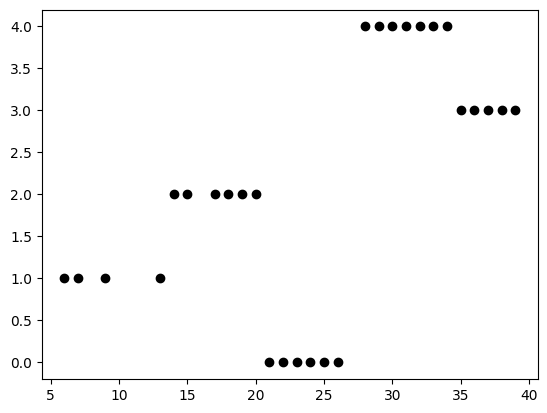

In [10]:
df_dummy = pd.DataFrame(df)


plt.scatter(df_dummy['SALES_BRANCH_CODE'], df_dummy['Centrum'], color= 'k')
plt.show()


In [14]:
df.groupby('Centrum', as_index = False)['Centrum'].count()

,Centrum
0,1
1,6
2,8
3,3
4,3
5,7
